Nguyễn Văn Tiến - AI ENGINEER INTERN - Thành phố Hồ Chí Minh
<br> Link GitHub : https://github.com/Tien2174802010901/BaiTestThucTap/tree/main/Nguy%E1%BB%85n%20V%C4%83n%20Ti%E1%BA%BFn%20-%20AI%20ENGINEER%20INTERN%20-%20Th%C3%A0nh%20ph%E1%BB%91%20H%E1%BB%93%20Ch%C3%AD%20Minh

# Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'sklearn'

# Bước 1: Đọc và làm sạch dữ liệu

In [ ]:
df = ['FPT.csv', 'MSN.csv', 'PNJ.csv', 'VIC.csv']
dataframes = [pd.read_csv(file) for file in df]

# Hiển thị thông tin cơ bản về dữ liệu

# Giả sử các file có cùng cấu trúc và chúng ta nối chúng lại với nhau

In [ ]:
df = pd.concat(dataframes, ignore_index=True)

# Chuyển đổi định dạng thời gian nếu cần

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Bước 2: Tạo biến mục tiêu

# Biến động giá cổ phiếu = Giá cổ phiếu N sau - Giá cổ phiếu hiện tại

In [ ]:
N = 1  # Số phút/giờ/ngày sau
df['price_change'] = df['Close'].shift(-N) - df['Close']

# Bước 3: Khám phá dữ liệu

# Vẽ biểu đồ giá cổ phiếu

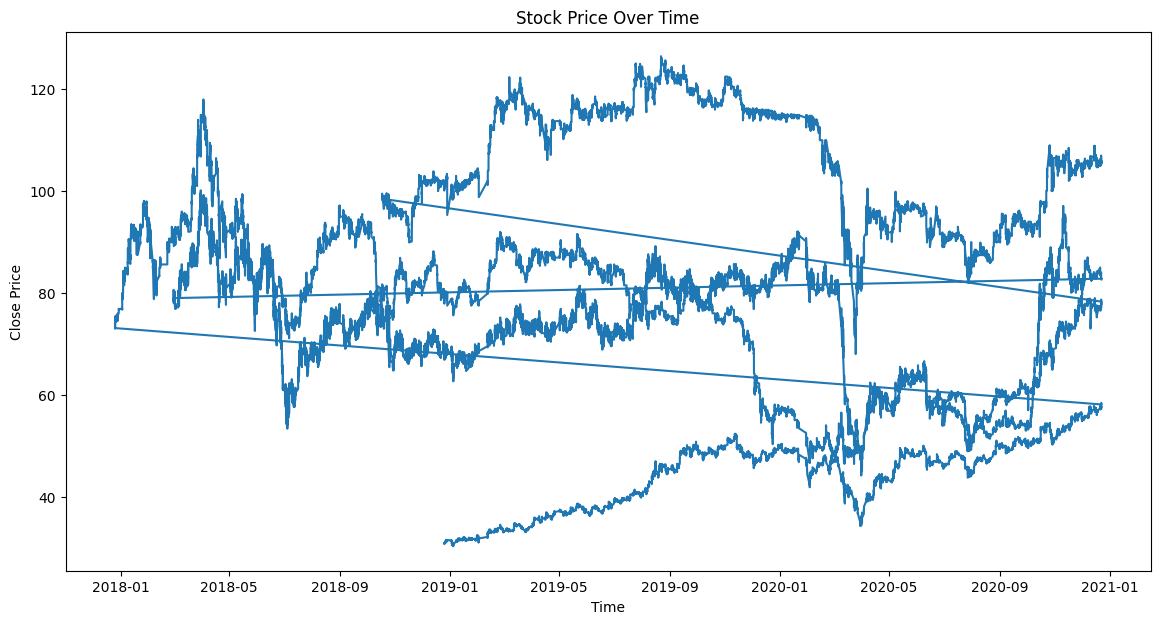

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date/Time'], df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')
plt.show()

# Bước 4: Xây dựng mô hình

# Chuẩn bị dữ liệu huấn luyện

In [ ]:
X = df[['Close', 'Volume']]  # Giả sử sử dụng giá và khối lượng làm đặc trưng
y = df['price_change'].dropna()

# Xóa các hàng có giá trị NaN

In [ ]:
X = X.iloc[:-N, :]  # Xóa các hàng cuối cùng không có giá trị tương ứng của y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y.iloc[:-N]
df = df.dropna()
df = df.dropna(axis=1)

In [ ]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,price_change
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,-0.08
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.07
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,0.00
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.00
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.00
...,...,...,...,...,...,...,...,...,...
459329,VIC,2020-12-22 14:21:00,105.80,105.80,105.80,105.80,1070,0,-0.10
459330,VIC,2020-12-22 14:22:00,105.80,105.80,105.70,105.70,1870,0,0.00
459331,VIC,2020-12-22 14:23:00,105.70,105.70,105.70,105.70,2510,0,0.00
459332,VIC,2020-12-22 14:24:00,105.70,105.70,105.70,105.70,3620,0,0.00


# Huấn luyện mô hình Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Bước 5: Đánh giá mô hình

In [ ]:
y_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

R2 Score: 0.00014273793143082525
Mean Squared Error: 0.1556493742479286


# Bước 6: Dự đoán

# Sử dụng mô hình để dự đoán biến động giá cổ phiếu trong tương lai

In [ ]:
future_prices = df[['Close', 'Volume']].iloc[-N:]
future_price_change = model.predict(future_prices)
print(f'Predicted price change for next {N} periods: {future_price_change}')

Predicted price change for next 1 periods: [-0.00427098]
